In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.types import *
from pyspark.sql import functions as sqlf

#Making results reproducible
import random
np.random.seed(42)
random.seed(42)

#Importing packages from sklearn
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

In [0]:
def readFile(filename):
  file = "/FileStore/tables/"+filename
  df = spark.read.option("header",True).option("wholeFile",True).option("escape","\"").option("multiLine",True).csv(file)
  df = df.withColumn("Date",sqlf.col("Date").cast(DateType())).withColumn("Open",sqlf.col("Open").cast(FloatType())).withColumn("High",sqlf.col("High").cast(FloatType())).withColumn("Low",sqlf.col("Low").cast(FloatType())).withColumn("Close",sqlf.col("Close").cast(FloatType())).withColumn("Adj Close",sqlf.col("Adj Close").cast(FloatType())).withColumn("Volume",sqlf.col("Volume").cast(LongType()))
  return df

df_old = readFile("AAPL_Original_Adjusted.csv")
df_new = readFile("AAPL2015_2020.csv")

display(df_new)

Date,Open,High,Low,Close,Adj Close,Volume
2015-01-02,27.8475,27.86,26.8375,27.3325,24.696352,212818400
2015-01-05,27.0725,27.1625,26.3525,26.5625,24.000614,257142000
2015-01-06,26.635,26.8575,26.1575,26.565,24.002876,263188400
2015-01-07,26.8,27.05,26.675,26.9375,24.339447,160423600
2015-01-08,27.3075,28.0375,27.175,27.9725,25.274624,237458000
2015-01-09,28.1675,28.3125,27.5525,28.0025,25.301731,214798000
2015-01-12,28.15,28.1575,27.2,27.3125,24.67828,198603200
2015-01-13,27.8575,28.2,27.2275,27.555,24.897392,268367600
2015-01-14,27.26,27.6225,27.125,27.45,24.802519,195826400
2015-01-15,27.5,27.515,26.665,26.705,24.129368,240056000


In [0]:
df_new.count()

Out[4]: 1483

In [0]:
new_pdf = df_new.toPandas()
old_pdf = df_new.toPandas()

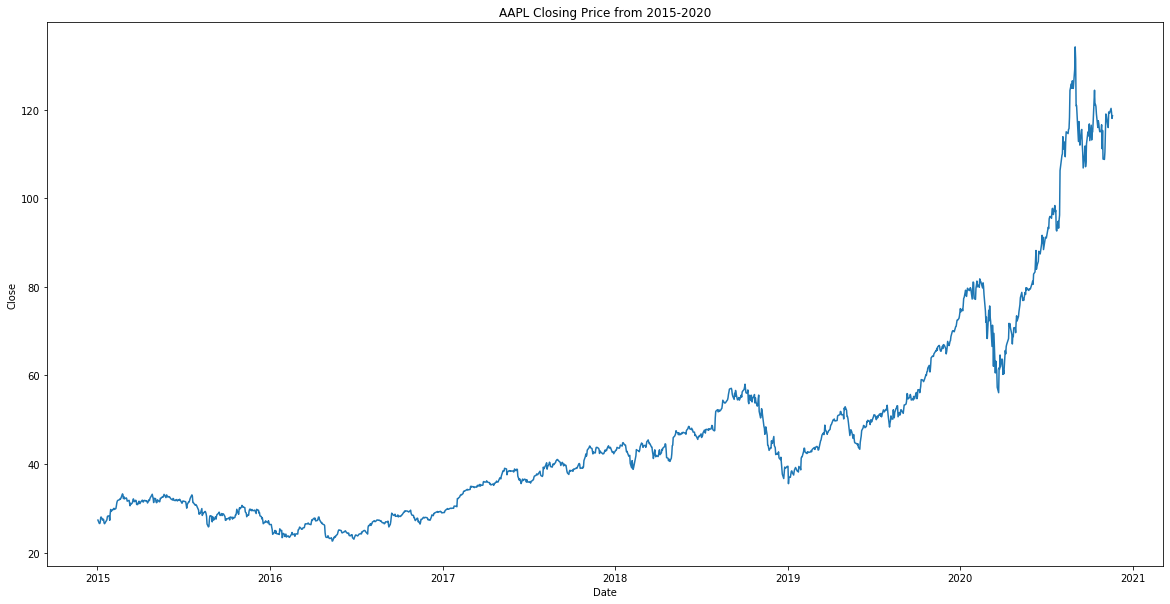

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='Date', y ='Close', data = new_pdf[['Date','Close']]).set_title('AAPL Closing Price from 2015-2020')
display(plt)

In [0]:
def get_exp_preprocessing(df, alpha=0.9):
    edata = df.ewm(alpha=alpha).mean()
    return edata

del(old_pdf['Adj Close'])
del(old_pdf['Date'])
sold_pdf = get_exp_preprocessing(old_pdf)
#del(new_pdf['Adj Close'])
#del(new_pdf['Date'])
snew_pdf = get_exp_preprocessing(new_pdf)
display(snew_pdf)

Open,High,Low,Close,Adj Close,Volume
27.84749984741211,27.860000610351562,26.837499618530273,27.332500457763672,24.696352005004883,2.128184E8
27.142954739657316,27.225909493186258,26.39659170670943,26.63250004161488,24.06386306069114,2.5311258181818178E8
26.68533806328301,26.8940091176076,26.181193154137414,26.571689674446176,24.008920016589467,2.6218989549549547E8
26.788543440220487,27.03441426563005,26.625663075760393,26.900951893666537,24.306424071400365,1.705910696669667E8
27.255609769995402,27.93720079775108,27.12007056500542,27.865354696065573,25.177812604790017,2.3077190877508774E8
28.076311385713854,28.27497041754473,27.509257239693568,27.98878607368979,25.289339370662994,2.1639537650097653E8
28.14263080188057,28.169246413201112,27.230926382781778,27.380128546503222,24.739385771109024,2.003824160488016E8
27.886013146286434,28.19692532824241,27.22784346222196,27.537513130882374,24.88159162418726,2.615690822167468E8
27.322601520058882,27.6799420516554,27.135284346129637,27.458751999654982,24.810426122491602,2.0240066816250625E8
27.48226015202186,27.53149365583429,26.71202925854525,26.78037513123311,24.197473657720096,2.3629046681963962E8


In [0]:
display(new_pdf)

Date,Open,High,Low,Close,Adj Close,Volume
2015-01-02,27.8475,27.86,26.8375,27.3325,24.696352,212818400
2015-01-05,27.0725,27.1625,26.3525,26.5625,24.000614,257142000
2015-01-06,26.635,26.8575,26.1575,26.565,24.002876,263188400
2015-01-07,26.8,27.05,26.675,26.9375,24.339447,160423600
2015-01-08,27.3075,28.0375,27.175,27.9725,25.274624,237458000
2015-01-09,28.1675,28.3125,27.5525,28.0025,25.301731,214798000
2015-01-12,28.15,28.1575,27.2,27.3125,24.67828,198603200
2015-01-13,27.8575,28.2,27.2275,27.555,24.897392,268367600
2015-01-14,27.26,27.6225,27.125,27.45,24.802519,195826400
2015-01-15,27.5,27.515,26.665,26.705,24.129368,240056000


In [0]:
"""
Indicators as shown by Peter Bakker at:
https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code
"""
# Import Built-Ins
import logging

# Import Homebrew

# Init Logging Facilities
log = logging.getLogger(__name__)

def momentum(df, n):
  """

  :param df: pandas.DataFrame 
  :param n: 
  :return: pandas.DataFrame
  """
  M = pd.Series(df['Close'].diff(n), name='Momentum_' + str(n))
  df = df.join(M)
  return df


def rate_of_change(df, n):
  """

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  M = df['Close'].diff(n - 1)
  N = df['Close'].shift(n - 1)
  ROC = pd.Series(M / N, name='ROC_' + str(n))
  df = df.join(ROC)
  return df


def average_true_range(df, n):
  """

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  TR_l = [0]
  while i < df.index[-1]:
    TR =max(df.loc[i+1,'High'],df.loc[i,'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
    TR_l.append(TR)
    i = i + 1
  TR_s = pd.Series(TR_l)
  ATR = pd.Series(TR_s.ewm(span=n, min_periods=n).mean(), name='ATR_' + str(n))
  df = df.join(ATR)
  return df

def stochastic_oscillator_d(df, n):
  """Calculate stochastic oscillator %D for given data.
  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
  SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO%d_' + str(n))#moving average of k, should usually be 3 periods but here is over n periods?
  #Seems like both %k and %d need to be above or below oversold/overbought points, currently only returns %d
  df = df.join(SOd)
  return df


def trix(df, n):
  """Calculate TRIX for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  EX1 = df['Close'].ewm(span=n, min_periods=n).mean()
  EX2 = EX1.ewm(span=n, min_periods=n).mean()
  EX3 = EX2.ewm(span=n, min_periods=n).mean()
  i = 0
  ROC_l = [np.nan]
  while i + 1 <= df.index[-1]:
      ROC = (EX3[i + 1] - EX3[i]) / EX3[i]
      ROC_l.append(ROC)
      i = i + 1
  Trix = pd.Series(ROC_l, name='Trix_' + str(n))
  df = df.join(Trix)
  return df

def vortex_indicator(df, n):
  """Calculate the Vortex Indicator for given data.

  Vortex Indicator described here:
      http://www.vortexindicator.com/VFX_VORTEX.PDF
  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  TR = [0]
  while i < df.index[-1]:
      Range = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
      TR.append(Range)
      i = i + 1
  i = 0
  VM = [0]
  while i < df.index[-1]:
      Range = abs(df.loc[i + 1, 'High'] - df.loc[i, 'Low']) - abs(df.loc[i + 1, 'Low'] - df.loc[i, 'High'])
      VM.append(Range)
      i = i + 1
  VI = pd.Series(pd.Series(VM).rolling(n).sum() / pd.Series(TR).rolling(n).sum(), name='Vortex_' + str(n))
  df = df.join(VI)
  return df


def relative_strength_index(df, n):
  """Calculate Relative Strength Index(RSI) for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  UpI = [0]
  DoI = [0]
  while i + 1 <= df.index[-1]:
      UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
      DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
      if UpMove > DoMove and UpMove > 0:
          UpD = UpMove
      else:
          UpD = 0
      UpI.append(UpD)
      if DoMove > UpMove and DoMove > 0:
          DoD = DoMove
      else:
          DoD = 0
      DoI.append(DoD)
      i = i + 1
  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
  NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
  RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
  df = df.join(RSI)
  return df

def accumulation_distribution(df, n):
  """Calculate Accumulation/Distribution for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  #Checking where price closed in the period and multiplying by volume
  cmfv = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
  #Cummulative, previous period added to the next, not exactly too sure what the author is doing in the code below
  M = cmfv.diff(n - 1)
  N = cmfv.shift(n - 1)
  ROC = M / N
  AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
  df = df.join(AD)
  return df

def money_flow_index(df, n):
  """Calculate Money Flow Index and Ratio for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  PP = (df['High'] + df['Low'] + df['Close']) / 3
  i = 0
  PosMF = [0]
  while i < df.index[-1]:
      if PP[i + 1] > PP[i]:
          PosMF.append(PP[i + 1] * df.loc[i + 1, 'Volume'])
      else:
          PosMF.append(0)
      i = i + 1
  PosMF = pd.Series(PosMF)
  TotMF = PP * df['Volume']
  MFR = pd.Series(PosMF / TotMF)
  MFI = pd.Series(MFR.rolling(n, min_periods=n).mean(), name='MFI_' + str(n))
  df = df.join(MFI)
  return df

def ease_of_movement(df, n):
  """Calculate Ease of Movement for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])
  Eom_ma = pd.Series(EoM.rolling(n, min_periods=n).mean(), name='EoM_' + str(n))
  df = df.join(Eom_ma)
  return df


def commodity_channel_index(df, n):
  """Calculate Commodity Channel Index for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  PP = (df['High'] + df['Low'] + df['Close']) / 3
  CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                  name='CCI_' + str(n))
  df = df.join(CCI)
  return df

def on_balance_volume(df, n):
  """Calculate On-Balance Volume for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  OBV = [0]
  while i < df.index[-1]:
      if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] > 0:
          OBV.append(df.loc[i + 1, 'Volume'])
      if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] == 0:
          OBV.append(0)
      if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] < 0:
          OBV.append(-df.loc[i + 1, 'Volume'])
      i = i + 1
  OBV = pd.Series(OBV)
  OBV_ma = pd.Series(OBV.rolling(n, min_periods=n).mean(), name='OBV_' + str(n))
  df = df.join(OBV_ma)
  return df

def macd(df, n_fast, n_slow):
  """Calculate MACD, MACD Signal and MACD difference

  :param df: pandas.DataFrame
  :param n_fast: 
  :param n_slow: 
  :return: pandas.DataFrame
  """
  EMAfast = pd.Series(df['Close'].ewm(span=n_fast, min_periods=n_slow).mean())
  EMAslow = pd.Series(df['Close'].ewm(span=n_slow, min_periods=n_slow).mean())
  MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
  MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
  MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
  df = df.join(MACD)
  df = df.join(MACDsign)
  df = df.join(MACDdiff)
  return df

In [0]:
#This takes the formulas from Bakker and adds extra columns to the dataframe with the indicator data, this will be
#our feature matrix (X)
def feature_extraction(data):
    for x in [5, 14, 26, 44, 66]:
        data = relative_strength_index(data, n=x)
        data = stochastic_oscillator_d(data, n=x)
        data = accumulation_distribution(data, n=x)
        data = average_true_range(data, n=x)
        data = momentum(data, n=x)
        data = money_flow_index(data, n=x)
        data = rate_of_change(data, n=x)
        data = on_balance_volume(data, n=x)
        data = commodity_channel_index(data, n=x)
        data = ease_of_movement(data, n=x)
        data = trix(data, n=x)
        data = vortex_indicator(data, n=x)
    
    data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
    data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
    data['ema14'] = data['Close'] / data['Close'].ewm(14).mean()
    data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()
        
    #Williams %R is missing
    data = macd(data, n_fast=12, n_slow=26)
    
    del(data['Open'])
    del(data['High'])
    del(data['Low'])
    del(data['Volume'])
    
    return data

#This returns a series that has a one if the price increase or 0 if the price decreases after n number of days
#This column will be the target vector (y)
def compute_prediction_int(df, n):
    pred = (df.shift(-n)['Close'] >= df['Close'])#returns a boolean if the price after a shifted number of days is higher or lower
    pred = pred.iloc[:-n]
    return pred.astype(int)

#This calls the feature_extraction function to add the new indicators to the dataframe as well as the compute_prediction
#that checks if the price increased or decreased after a certian "horizon"
def prepare_data(df, horizon):
    data = feature_extraction(df).dropna().iloc[:-horizon]
    data['pred'] = compute_prediction_int(data, n=horizon)
    del(data['Close'])
    return data.dropna()

In [0]:
def equivalent_type(f):
    if f == 'datetime64[ns]': return DateType()
    elif f == 'int64': return LongType()
    elif f == 'int32': return IntegerType()
    elif f == 'float64': return FloatType()
    else: return StringType()

def define_structure(string, format_type):
    try: typo = equivalent_type(format_type)
    except: typo = StringType()
    return StructField(string, typo)
  
def pandas_to_spark(pandas_df):
    columns = list(pandas_df.columns)
    types = list(pandas_df.dtypes)
    struct_list = []
    for column, typo in zip(columns, types): 
      struct_list.append(define_structure(column, typo))
    p_schema = StructType(struct_list)
    return sqlContext.createDataFrame(pandas_df, p_schema)

In [0]:
#Converting from pandas df to spark df
data = pandas_to_spark(prepare_data(sold_pdf,10))
display(data)

RSI_5,SO%d_5,Acc/Dist_ROC_5,ATR_5,Momentum_5,MFI_5,ROC_5,OBV_5,CCI_5,EoM_5,Trix_5,Vortex_5,RSI_14,SO%d_14,Acc/Dist_ROC_14,ATR_14,Momentum_14,MFI_14,ROC_14,OBV_14,CCI_14,EoM_14,Trix_14,Vortex_14,RSI_26,SO%d_26,Acc/Dist_ROC_26,ATR_26,Momentum_26,MFI_26,ROC_26,OBV_26,CCI_26,EoM_26,Trix_26,Vortex_26,RSI_44,SO%d_44,Acc/Dist_ROC_44,ATR_44,Momentum_44,MFI_44,ROC_44,OBV_44,CCI_44,EoM_44,Trix_44,Vortex_44,RSI_66,SO%d_66,Acc/Dist_ROC_66,ATR_66,Momentum_66,MFI_66,ROC_66,OBV_66,CCI_66,EoM_66,Trix_66,Vortex_66,ema50,ema21,ema14,ema5,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,pred
0.56636167,0.5933981,-0.29823217,0.5118719,0.13036314,0.4,0.008540216,-4.2916984E7,0.7425698,1.864032E-10,-1.565728E-4,0.17030773,0.4618722,0.6095813,-0.80274105,0.6057971,-0.6176745,0.5,-0.027415646,-6038166.5,0.21363834,-1.5563041E-10,-8.600735E-4,-0.12544943,0.40337136,0.5936986,-0.826422,0.6698731,0.5945319,0.5769231,-0.0021857356,1.731845E7,-0.3656608,2.5424052E-11,-0.0015213025,0.04561473,0.36778808,0.57373524,-0.9191649,0.7131529,-0.57422954,0.5681818,-0.02909363,9089801.0,-0.14352529,-2.0482063E-10,-0.0014652887,-0.062694885,0.3555577,0.55709636,-0.80902565,0.71998733,-2.8033602,0.54545456,-0.10861082,-1.2202539E7,-0.62725246,-1.8857134E-10,-9.3094516E-4,-0.07659767,0.95291907,0.9852824,0.99481726,1.0032573,-0.17682892,-0.19872122,0.021892296,1.0
0.33823547,0.5140901,-1.7124733,0.5159297,-0.11521362,0.4,0.0066918707,-4.0008472E7,-0.37963447,6.6623596E-11,-1.976796E-4,0.008823783,0.3936793,0.57570034,-0.36716983,0.5948969,-1.1395177,0.42857143,-0.038046002,-3.239234E7,-0.28438833,-2.0227435E-10,-8.6212106E-4,-0.17980348,0.374628,0.57605237,-0.7931877,0.6590711,-0.41304648,0.53846157,2.674855E-4,2284677.0,-0.85935056,-3.9469285E-11,-0.0014909491,-0.030948969,0.3538194,0.56403357,3.1668239,0.7047471,-1.1891726,0.5681818,-0.041520182,-3972624.2,-0.49090832,-1.5760515E-10,-0.0014627707,-0.033932667,0.34685418,0.5510628,9.529955,0.7141238,-3.756587,0.530303,-0.1212048,-1.7469402E7,-0.7769027,-2.1861993E-10,-9.3756086E-4,-0.10719329,0.9420342,0.97407776,0.9834525,0.9921755,-0.18538685,-0.19605434,0.01066749,1.0
0.47022516,0.6068899,-0.50327945,0.48438326,0.5194788,0.6,-0.0014359104,3.8963544E7,0.1530019,2.76165E-10,3.1027153E-5,0.3904388,0.43347707,0.60460556,-1.4633157,0.5717493,-0.7552014,0.42857143,-0.008507288,-5630391.5,0.57767916,-2.4364802E-10,-8.416214E-4,-0.22384745,0.39386347,0.59208477,-0.18786556,0.6414577,0.34344515,0.5769231,-0.005661474,2.0775112E7,-0.47127375,-4.1290922E-11,-0.0014580401,-0.03163932,0.36423948,0.57418835,-0.18310273,0.6921475,-0.85916746,0.5681818,-0.035969432,-5379994.5,-0.1842644,-1.8337949E-10,-0.0014589598,-0.058972165,0.35357988,0.55828696,0.26704454,0.7053614,-3.4694088,0.530303,-0.11828386,-1.7148906E7,-0.62010705,-2.2076832E-10,-9.436445E-4,-0.109392375,0.9543955,0.98657256,0.99573433,1.0035477,-0.16317037,-0.18947755,0.026307173,1.0
0.47022516,0.53664434,-0.45742363,0.4468621,-0.19105254,0.4,-0.004658917,-3.5172724E7,-0.24492687,5.973873E-11,7.813242E-5,0.12558134,0.43347707,0.57681197,-0.806543,0.5450921,-0.39052048,0.42857143,0.01540978,-1828150.1,0.7276673,-1.7076361E-10,-8.181233E-4,-0.13840498,0.39386347,0.5775713,-1.1714393,0.6214845,-0.3099052,0.53846157,-0.025578927,4785628.0,-0.5409538,-3.3619427E-11,-0.001425142,-0.0245968,0.36423948,0.56627476,-1.35711,0.67790914,-1.1929164,0.54545456,-0.050625622,-1.2938321E7,-0.21655507,-1.8212276E-10,-0.0014543609,-0.058221996,0.35357988,0.5534358,-1.2643155,0.6953817,-3.8974407,0.5151515,-0.13419926,-2.1555718E7,-0.6265135,-2.2787762E-10,-9.4935775E-4,-0.11562358,0.950203,0.98207957,0.9909916,0.99843746,-0.15594187,-0.18277042,0.026828537,1.0
0.34132126,0.6689785,3.1368628,0.43330202,0.010145845,0.2,-9.4838E-4,1.5603912E7,-0.01087495,-1.5942557E-10,2.4312084E-4,-0.23064691,0.4037821,0.62438995,-78.81961,0.52657074,0.5616993,0.42857143,0.013207402,2.7306008E7,0.6408497,3.5163334E-11,-7.8006735E-4,-0.0013414016,0.38232037,0.6039473,-2.2293437,0.60553616,-0.58898956,0.5,-0.03050

In [0]:
#Creating features column
ignore = ['pred','gain']
assembler = VectorAssembler(
    inputCols=[x for x in data.columns if x not in ignore],
    outputCol='features')

assem_df = assembler.transform(data)

#Splitting the data into 2/3 for training and 1/3 for testing
train, test = assem_df.randomSplit([2/3, 1/3])
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 839
Test Dataset Count: 428

In [0]:
#Initializing RandomForestClassifier and training
model=RandomForestClassifier(featuresCol = 'features', labelCol = 'pred').setNumTrees(65)
rfmodel = model.fit(train)
pred = rfmodel.transform(test).select(sqlf.col('pred').alias('label'), 'prediction')

In [0]:
predictionAndLabels=pred.rdd
metrics = MulticlassMetrics(predictionAndLabels)

cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
print('precision: {0:1.2f}, recall: {1:1.2f}, accuracy: {2:1.2f}'.format(precision, recall, accuracy))

precision: 0.35, recall: 0.74, accuracy: 0.74